### Import Libraries


In [ ]:
import math
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

###Dataset

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

In [ ]:
# Display the last few rows of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
18865,198305240006,1983,5,24,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18866,198305240007,1983,5,24,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18867,198305240008,1983,5,24,NaN,0,NaN,145,Nicaragua,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18868,198305240009,1983,5,24,NaN,0,NaN,145,Nicaragua,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
18869,198305240010,1983,5,24,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#As there are too many columns in dataset, we are taking only important columns from the dataset for data preprocessing

df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
#Cheching the null values

df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state             85
Region             0
city               0
latitude         747
longitude        747
AttackType         0
Killed          3522
Wounded         5043
Target           192
Summary        17913
Group              0
Target_type        0
Weapon_type        0
Motive         18182
dtype: int64

In [ ]:
df.shape

(18870, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         18870 non-null  int64  
 1   Month        18870 non-null  int64  
 2   Day          18870 non-null  int64  
 3   Country      18870 non-null  object 
 4   state        18785 non-null  object 
 5   Region       18870 non-null  object 
 6   city         18870 non-null  object 
 7   latitude     18123 non-null  float64
 8   longitude    18123 non-null  float64
 9   AttackType   18870 non-null  object 
 10  Killed       15348 non-null  float64
 11  Wounded      13827 non-null  float64
 12  Target       18678 non-null  object 
 13  Summary      957 non-null    object 
 14  Group        18870 non-null  object 
 15  Target_type  18870 non-null  object 
 16  Weapon_type  18870 non-null  object 
 17  Motive       688 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [ ]:
df.describe

<bound method NDFrame.describe of        Year  Month  Day             Country             state  \
0      1970      7    2  Dominican Republic               NaN   
1      1970      0    0              Mexico           Federal   
2      1970      1    0         Philippines            Tarlac   
3      1970      1    0              Greece            Attica   
4      1970      1    0               Japan           Fukouka   
...     ...    ...  ...                 ...               ...   
18865  1983      5   24            Colombia         Santander   
18866  1983      5   24            Colombia   Valle del Cauca   
18867  1983      5   24           Nicaragua         Chontales   
18868  1983      5   24           Nicaragua     Nueva Segovia   
18869  1983      5   24      United Kingdom  Northern Ireland   

                            Region             city   latitude   longitude  \
0      Central America & Caribbean    Santo Domingo  18.456792  -69.951164   
1                    North Am

In [ ]:
df['Year'].value_counts(dropna = False).sort_index()

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    1163
1986       1
Name: Year, dtype: int64

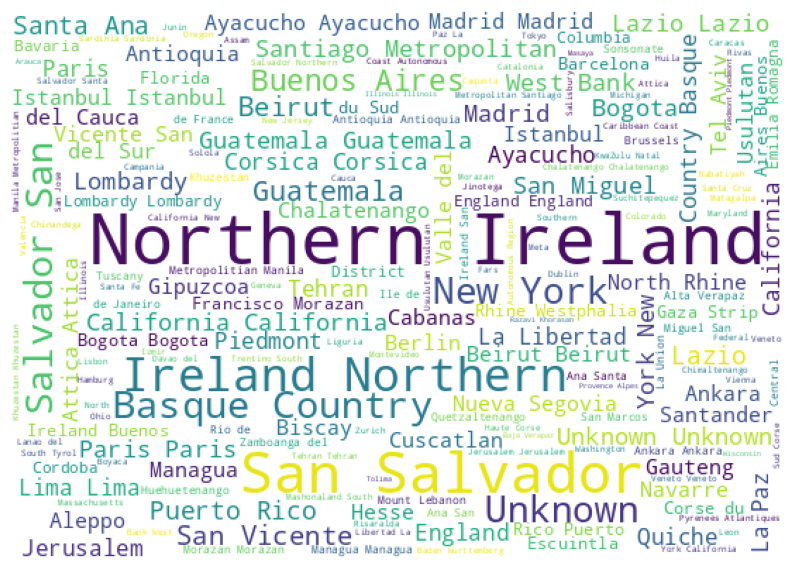

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 550,
                     height = 390).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Data visualization
people killed and wounded in each year

In [ ]:
b=df[["Year","Wounded"]].groupby("Year").sum()
b.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


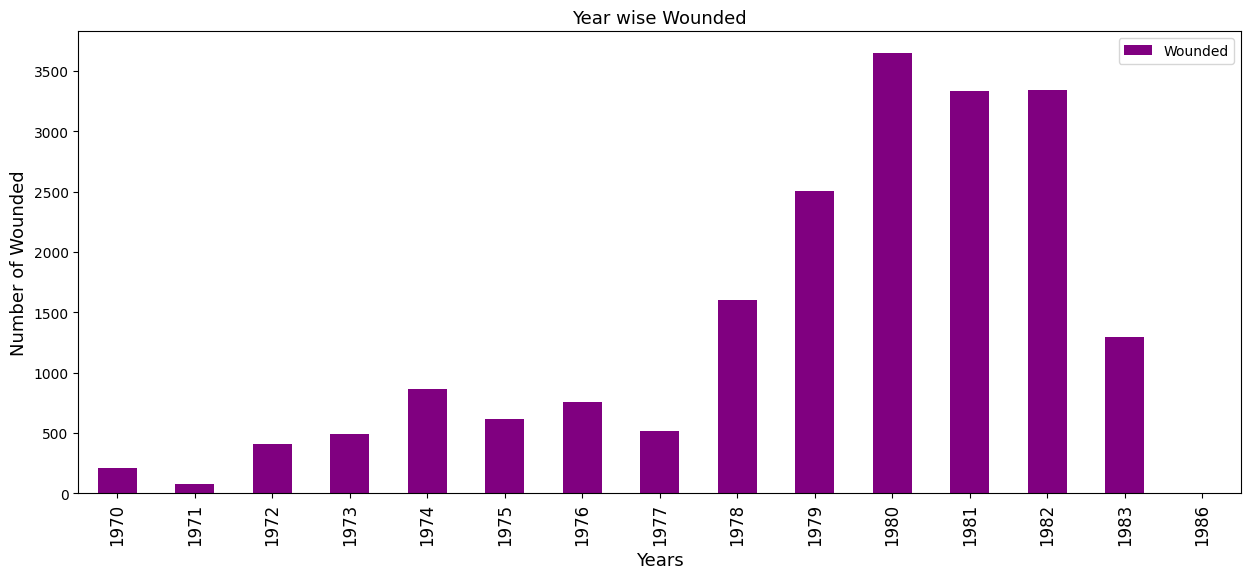

In [ ]:
b.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Year wise Wounded",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Wounded",fontsize=13)
plt.show()

In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [ ]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

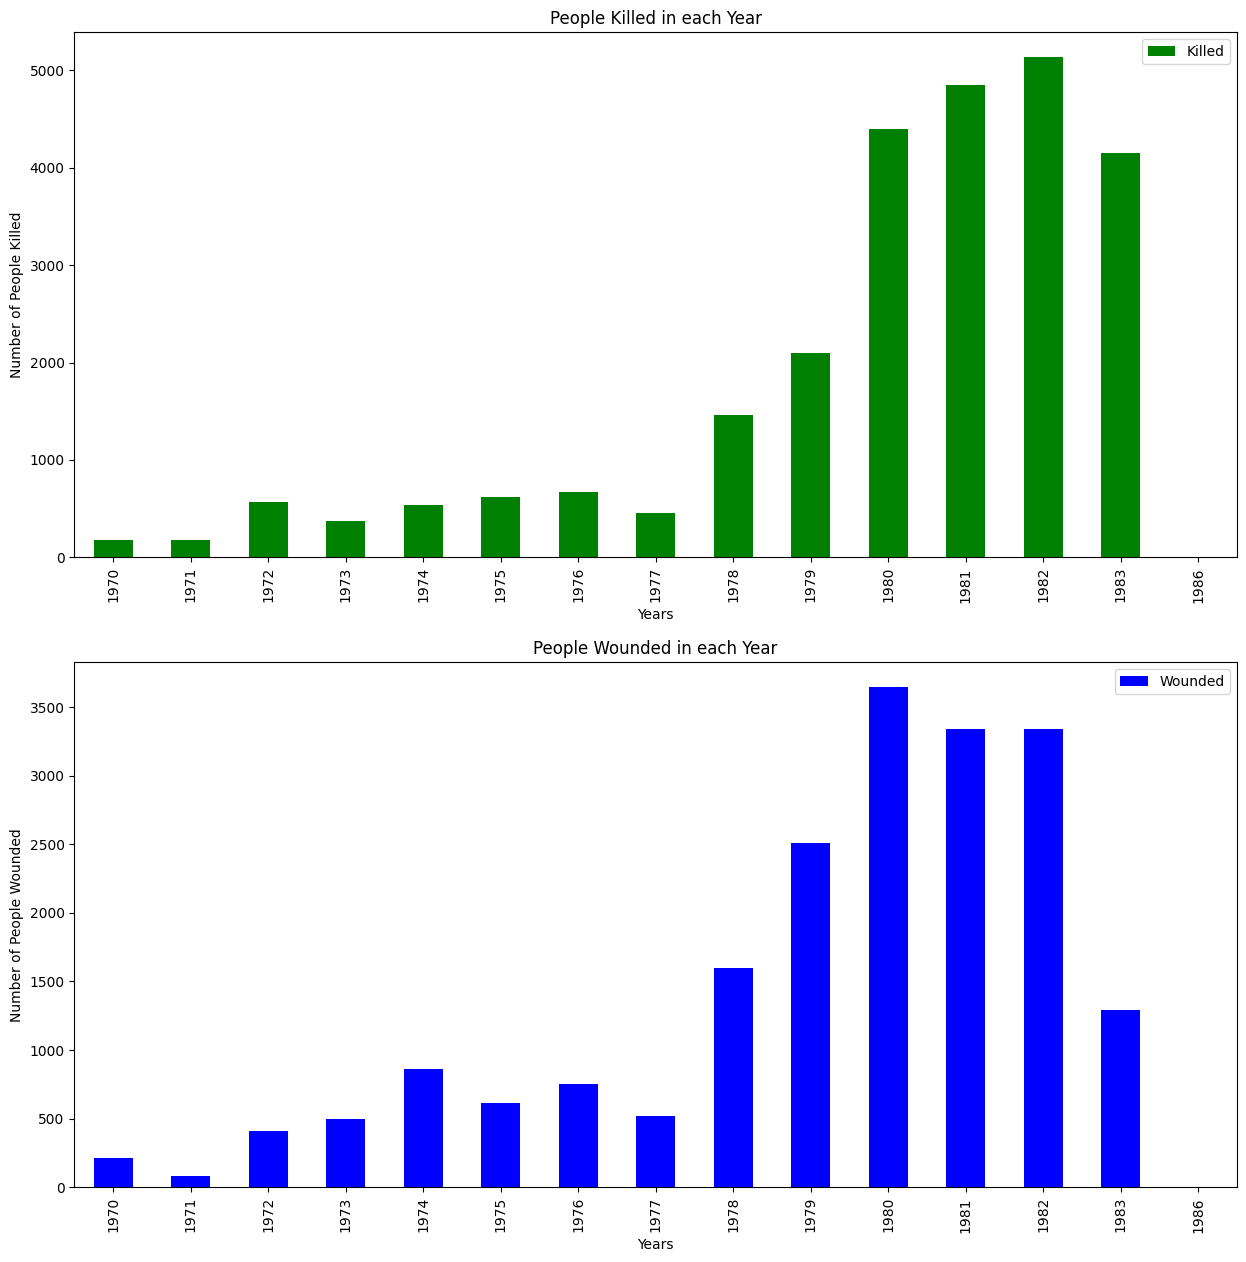

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="green",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="blue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

###Number of Terrorist Activities each Year

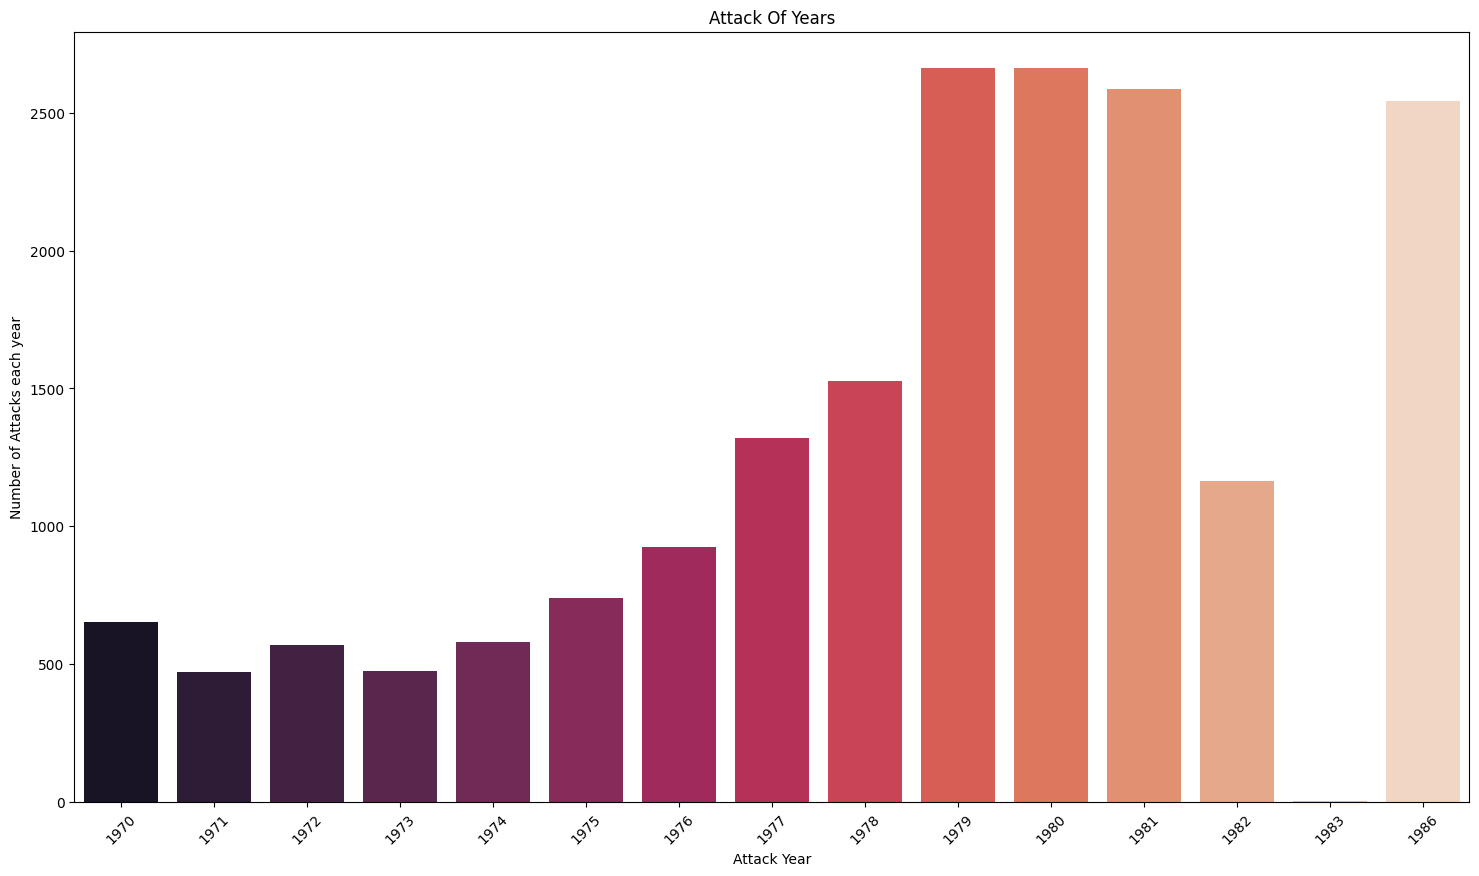

In [ ]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack Of Years')
plt.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

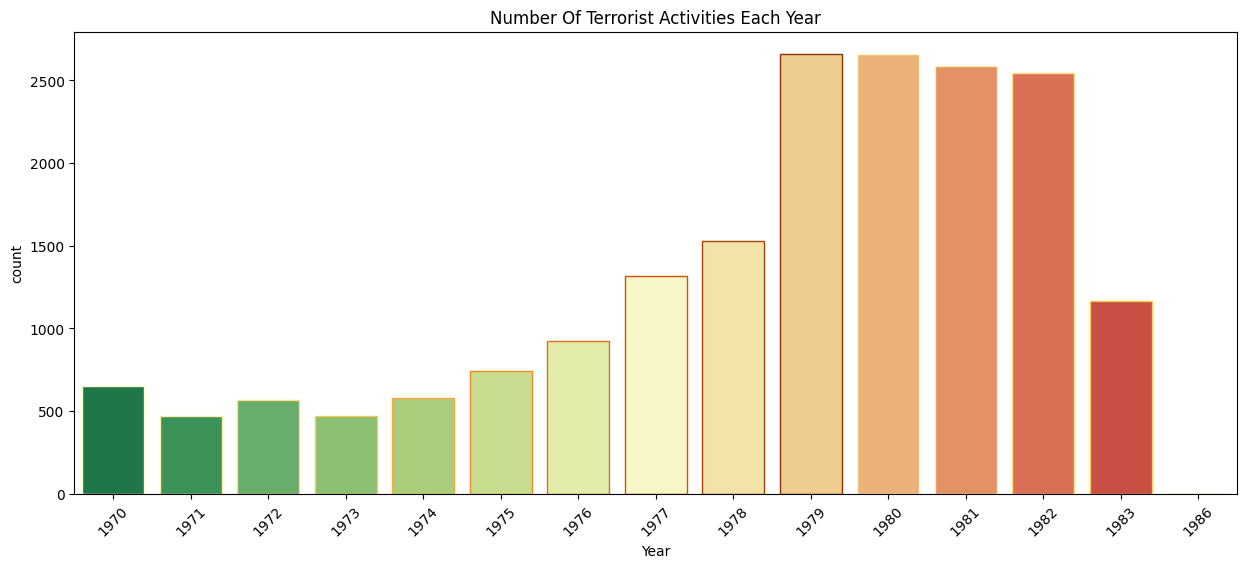

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')

### Terrorist Activities by Region in each Year through Area Plot

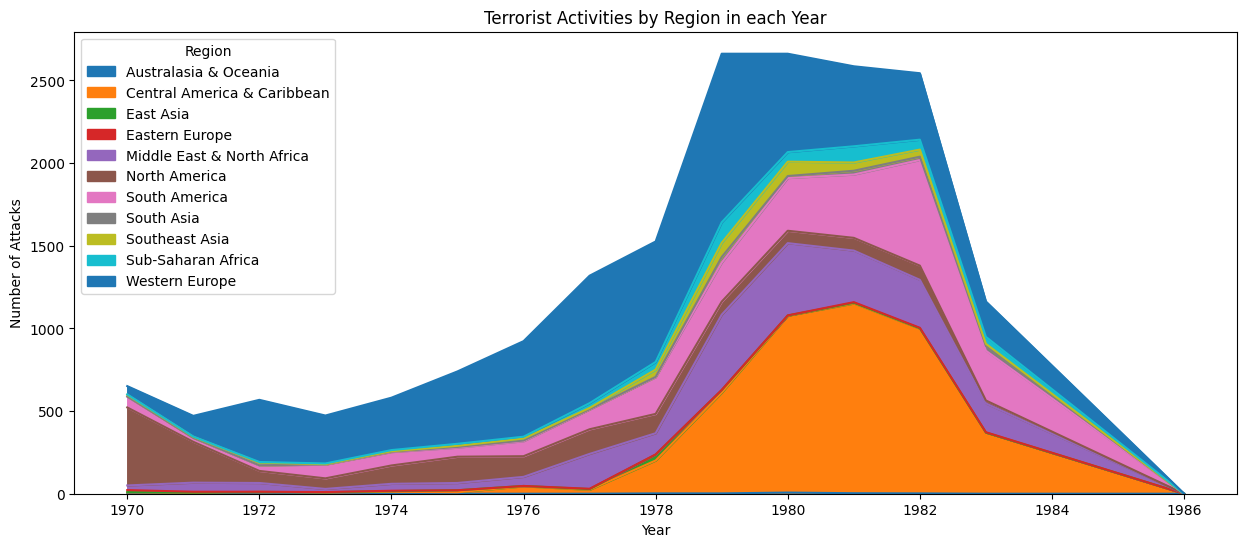

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

### Heatmap

In [ ]:
t1 = df.sort_values(by='casualities',ascending=False)[:40]
heat=t1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983
Country,,,,,,,,,,,,
El Salvador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,220.0,100.0,112.666667,111.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.000000,0.0
Guatemala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,135.000000,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,422.0,0.0,106.0,0.0,440.000000,0.0
Iraq,0.0,0.0,0.0,0.0,295.0,0.0,0.0,0.0,0.0,0.0,158.000000,0.0


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
a=regt["Total"].sort_values(ascending=False)
a

Region
Western Europe                 6390
Central America & Caribbean    4502
South America                  2651
Middle East & North Africa     2303
North America                  1852
Sub-Saharan Africa              500
Southeast Asia                  387
South Asia                      135
East Asia                        86
Eastern Europe                   36
Australasia & Oceania            28
Name: Total, dtype: int64

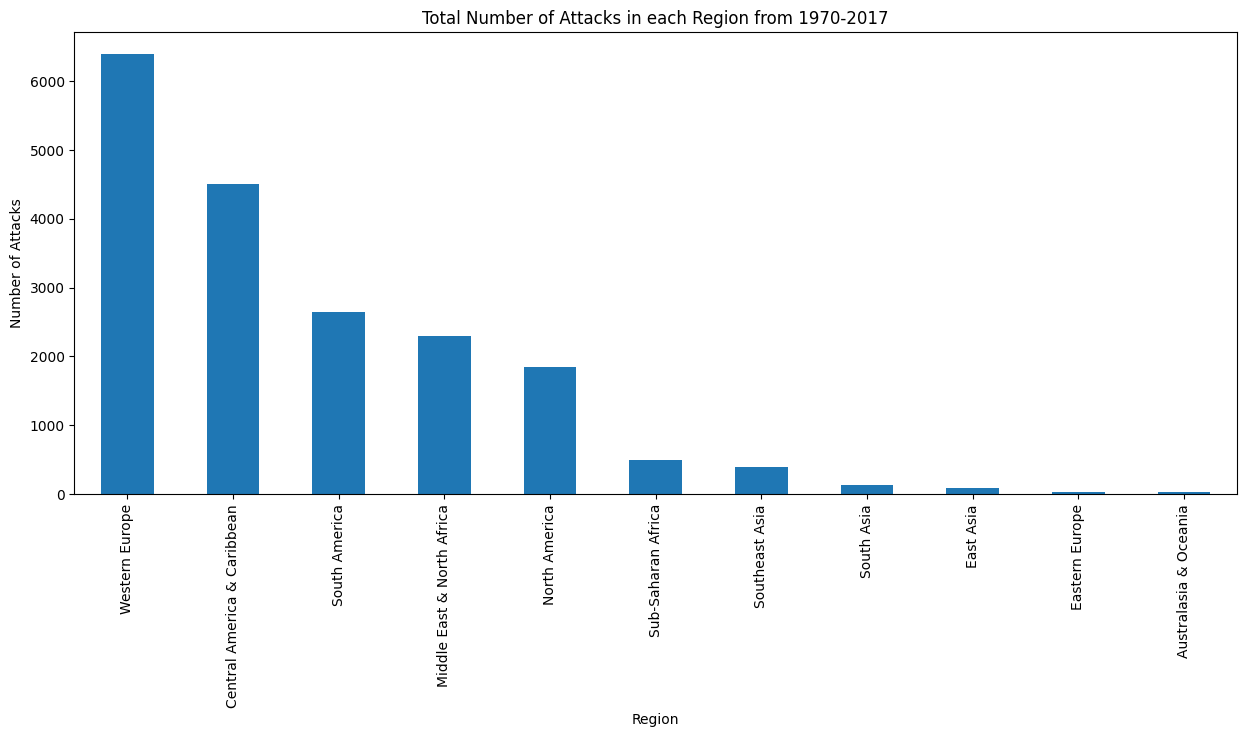

In [ ]:
a.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

### Top Countries affected by Terror Attacks

In [ ]:
df.Country.value_counts()[:15]

El Salvador           2547
United Kingdom        2087
United States         1711
Spain                 1374
Italy                 1226
Guatemala             1194
Colombia              1051
France                 781
Peru                   757
Turkey                 593
Nicaragua              562
Lebanon                508
Israel                 399
Iran                   378
West Germany (FRG)     354
Name: Country, dtype: int64

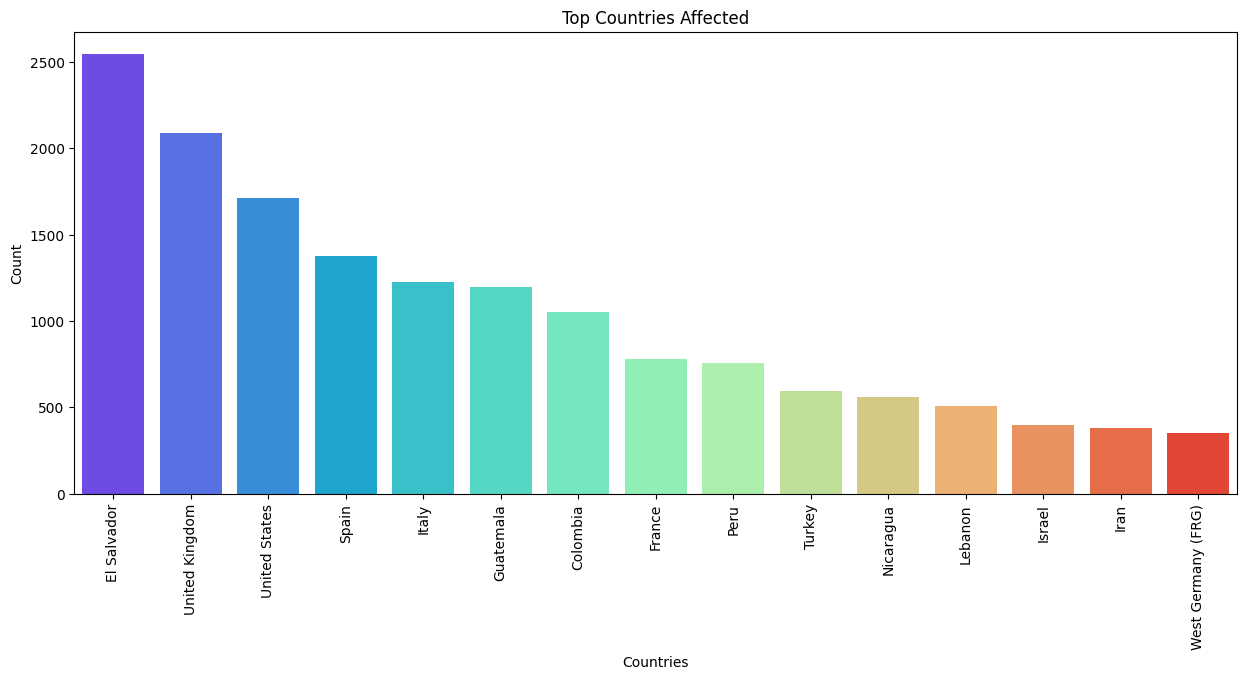

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 6))
top_countries = df['Country'].value_counts()[:15]
sns.barplot(x=top_countries.index, y=top_countries.values,  palette='rainbow')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()


### Customized Data Analysis
Terrorist Attacks of a Particular year and their Locations

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = df['Year'] == 1974

In [ ]:
filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map


In 1970, 84% of global terrorist attacks occurred in the American continent, while the Middle East and North Africa, currently recognized as regions with heightened conflicts and terrorism, had only one recorded terrorist incident that year.

###Types of terrorist attacks that cause deaths

In [ ]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 25667


In [ ]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,13718,3941,5348,591,186,240,389,19,1235


In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


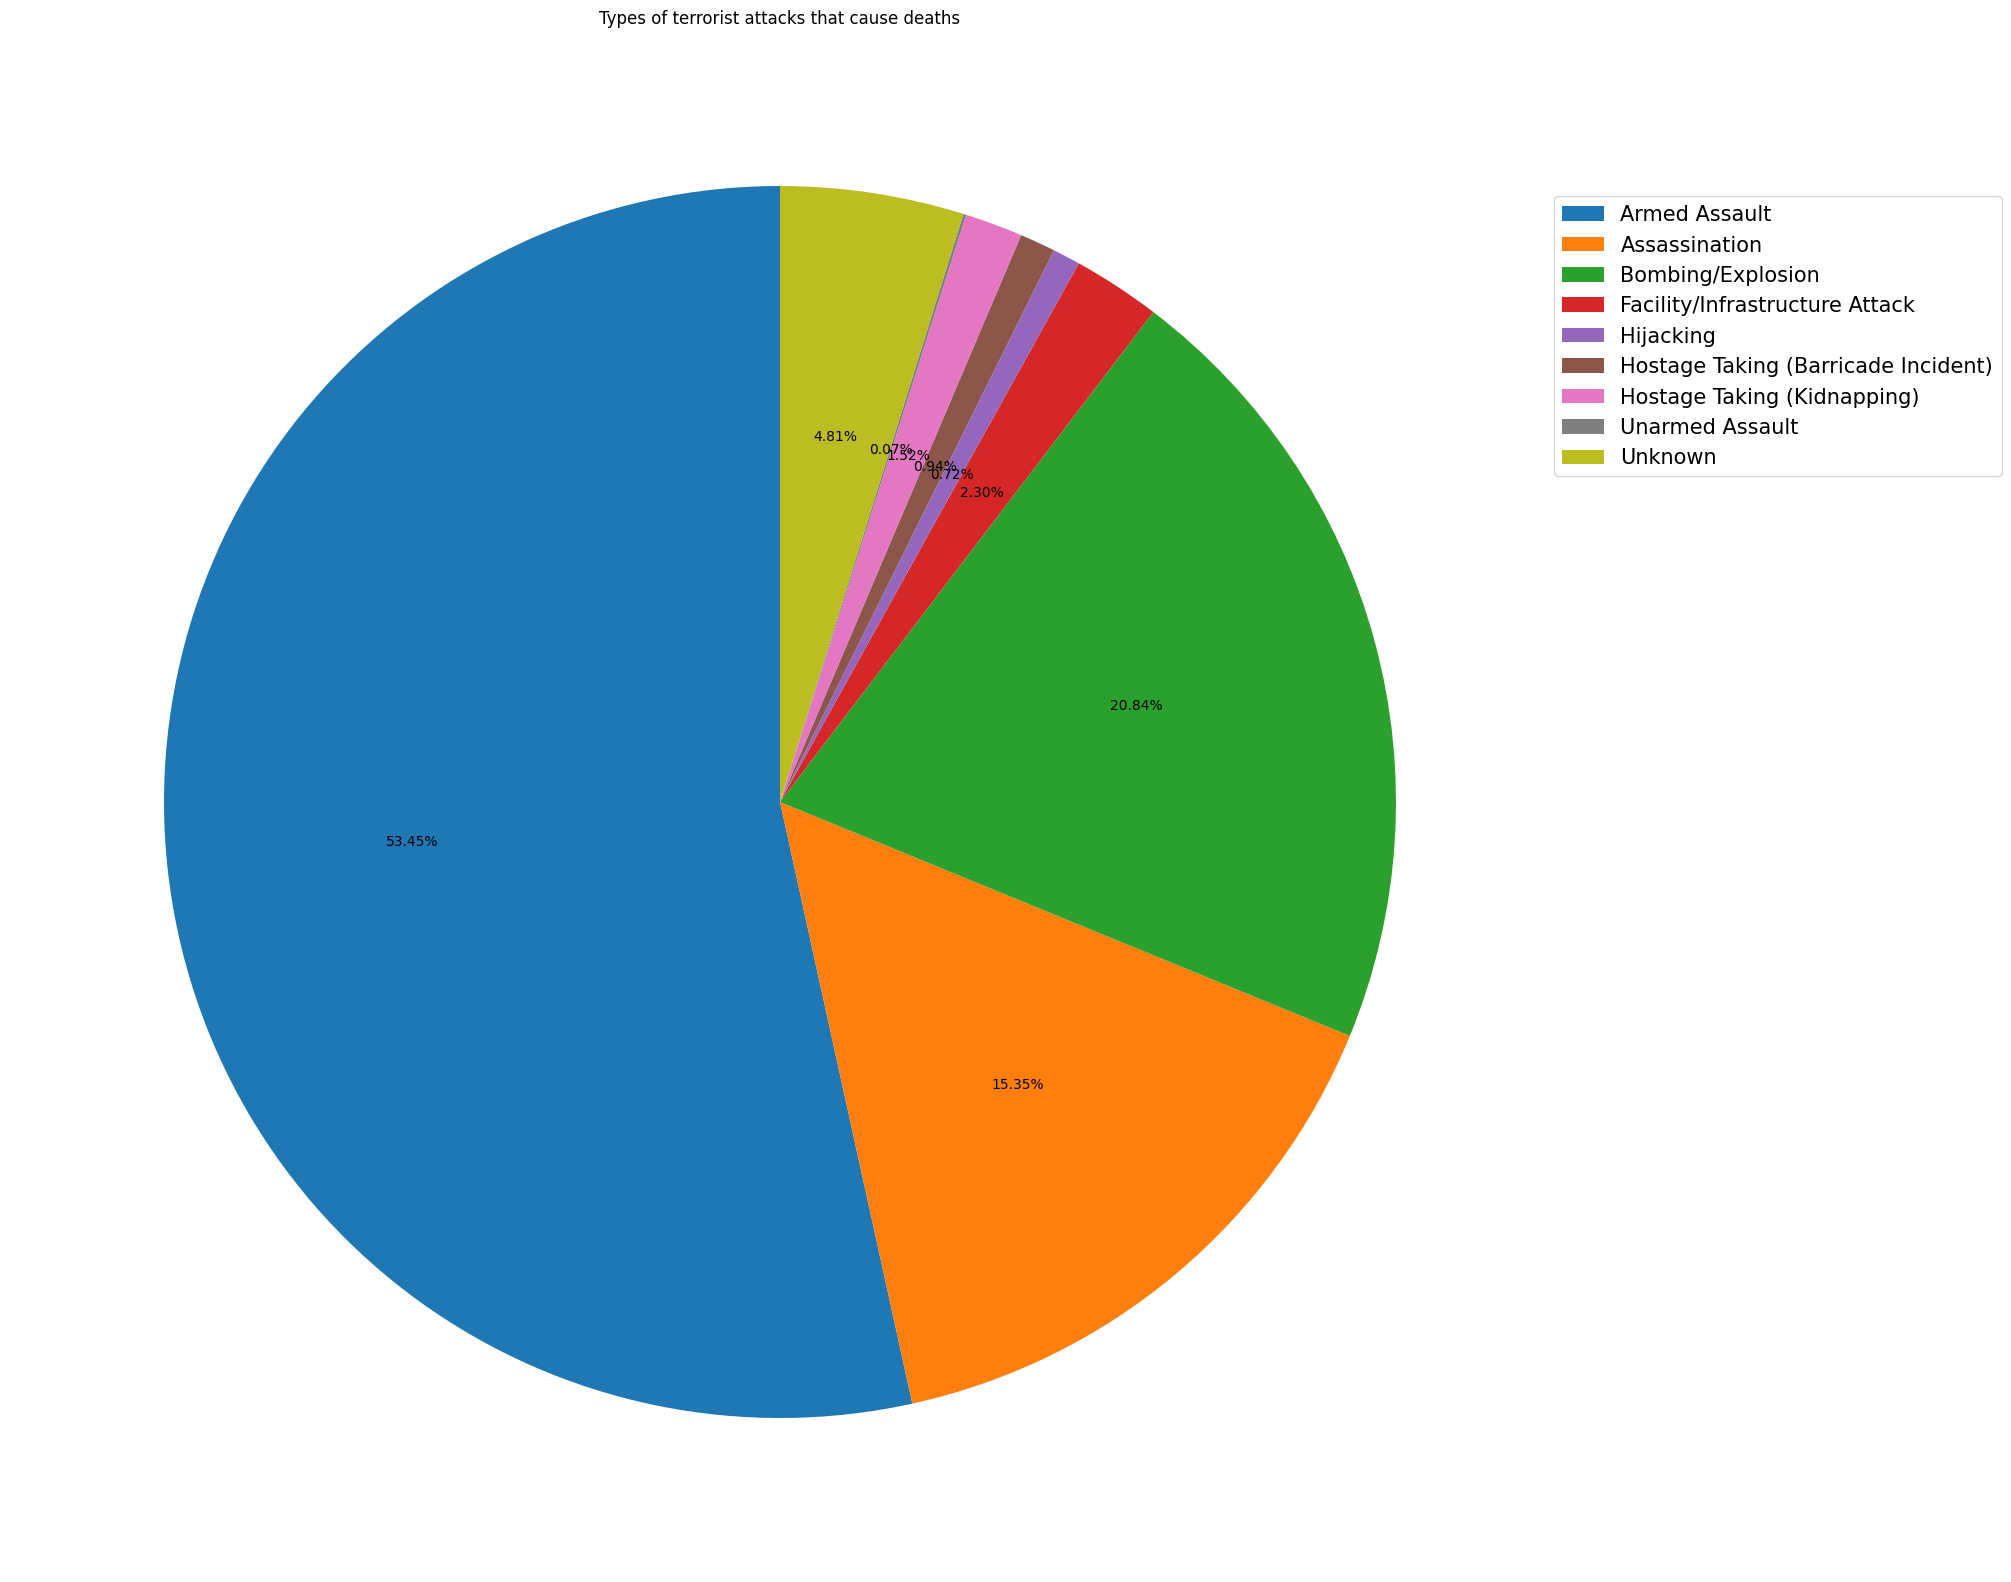

In [ ]:
import numpy as np

labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze

# Assuming values is a 2D array
values = transpoze.values.tolist()
values = np.array(values).flatten()  # Flatten the 2D array to make it 1D

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # location legend
plt.show()


A substantial proportion, around 74%, of the casualties arising from such incidents is attributed to the amalgamation of armed assaults and bombings/explosions. This elevated fatality rate emphasizes the recurrent deployment of these strategies in acts of terrorism, underscoring the substantial global threat posed by weaponry and explosives.

###Number of People Killed in Terrorist Attacks (By Countries)

In [ ]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,...,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,53,0,0,0,134,329,6,12,0,0,...,4,0,37,60,68,0,4,1,5,58


### Region Wise Casuality

In [ ]:
c=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
c

,Wounded
Region,
Middle East & North Africa,7105
Western Europe,4841
Central America & Caribbean,2247
Southeast Asia,2179
Sub-Saharan Africa,1189
South America,823
North America,758
South Asia,386
East Asia,95


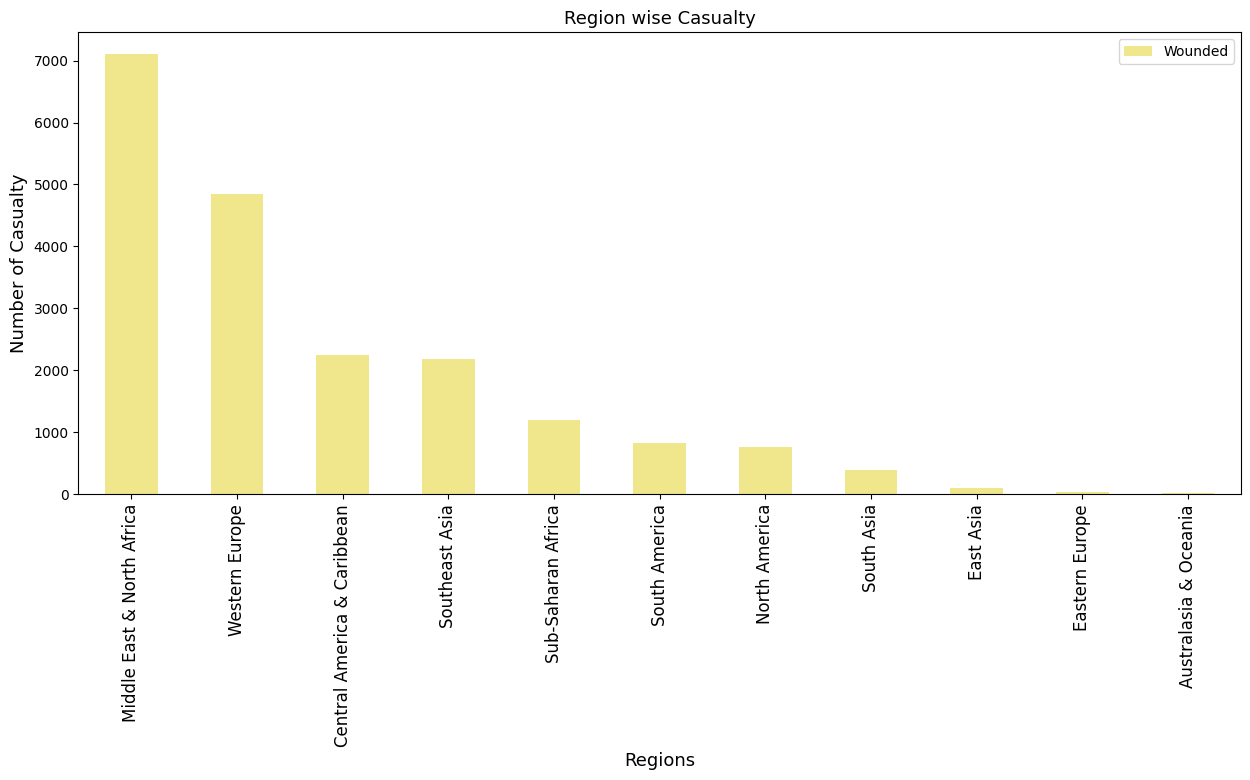

In [ ]:
c.plot(kind="bar",color="khaki",figsize=(15,6))
plt.title("Region wise Casualty",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=13)
plt.show()

### People Killed and Wounded In Each Region

In [ ]:
k=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
k

,Killed
Region,
Central America & Caribbean,12822
Western Europe,3445
Middle East & North Africa,3258
South America,3085
Southeast Asia,1331
Sub-Saharan Africa,1061
North America,309
South Asia,275
East Asia,38


In [ ]:
w=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
w

,Wounded
Region,
Middle East & North Africa,7105
Western Europe,4841
Central America & Caribbean,2247
Southeast Asia,2179
Sub-Saharan Africa,1189
South America,823
North America,758
South Asia,386
East Asia,95


<function matplotlib.pyplot.show(close=None, block=None)>

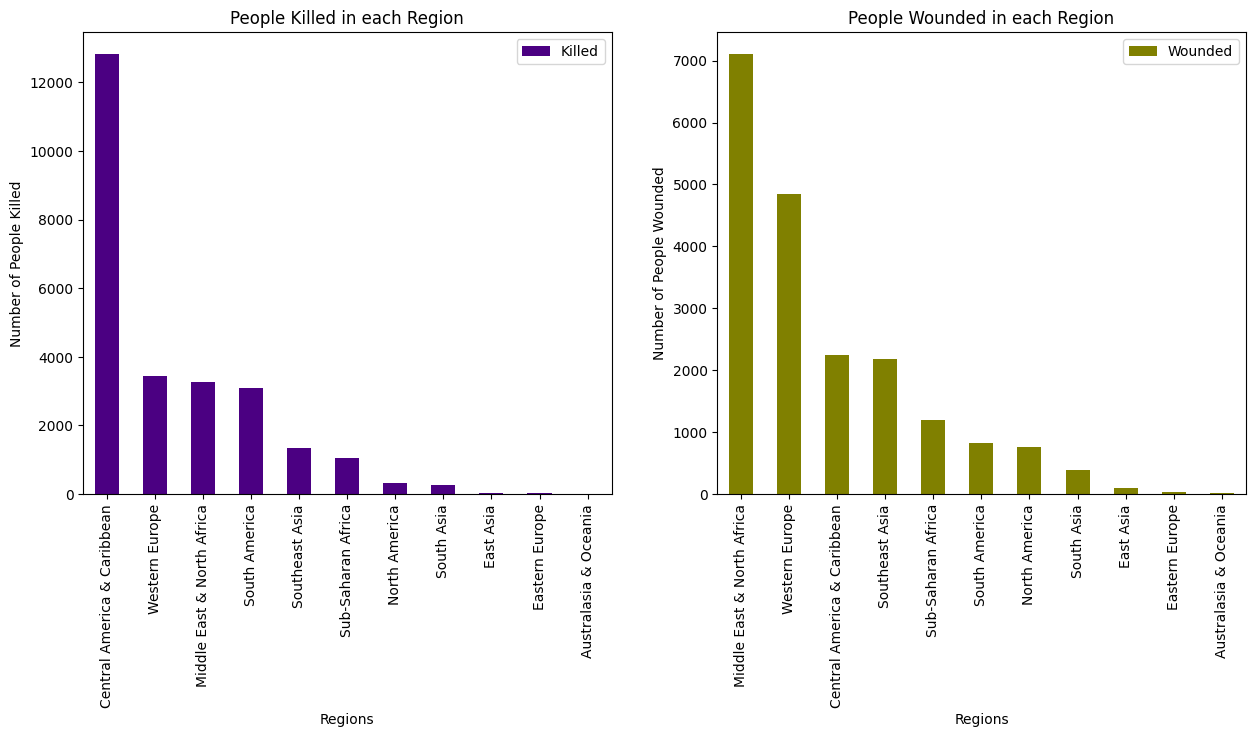

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#People Killed
k.plot(kind="bar",color="indigo",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#People Wounded
w.plot(kind="bar",color="olive",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show

### Conclusion
Acts of terrorism in the Central America and Caribbean area have been linked to grave and fatal consequences. This region has been recognized as a focal point for major terrorist assaults. Despite the prevalent misconception associating Muslims with terrorism, it is important to highlight that Muslims are frequently the main targets of these acts of terrorism. An in-depth analysis of data visualizations indicates that Iraq, Afghanistan, and Pakistan are among the nations most severely impacted, and it is significant to acknowledge that these countries have predominantly Muslim populations.